In [45]:
import sys
sys.path.append("..")

from utils import *

# Verschiltoetsen

In [46]:
def f_choose_domain(test_statistic, critical_value_right, dfn, dfd):
    if max(dfn, dfd) <= 10:
        xmin, xmax = 0, max(10, test_statistic + 1)
    else:
        xmin, xmax = 0, max(6, test_statistic + 1)
    return xmin, xmax

def f_calculate_yaxis_ub(y, dfn, dfd):
    if dfn <= 2 or dfd <= 2:
        top = 0.5
    else:
        top = max(y) * 1.1
    return top

def plot_F_toets(f_statistic, alpha, dfn, dfd, filename):
    critical_value_left = f.ppf(q=alpha/2, dfn=dfn, dfd=dfd)
    critical_value_right = f.ppf(q=1-alpha/2, dfn=dfn, dfd=dfd)
    
    xmin, xmax = f_choose_domain(f_statistic, critical_value_right, dfn, dfd)
    x = np.linspace(xmin, xmax, 1000)
    y = f.pdf(x, dfn, dfd)
    maxy = f_calculate_yaxis_ub(y, dfn, dfd)

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(x, y)

    ymin, ymax = ax.get_ylim()
    ytext, offset = get_y_annotation(ax)
    ymu = 1/4 * ytext
    ylines = 1/2 * ytext
    ax.set_ylim(ymin - 2 * offset, ymax)
    
    # testing is two-sided
    ax.plot([f_statistic, f_statistic], [0, f.pdf(f_statistic, dfn, dfd)], color=primary_plot_color, linestyle='--')
    ax.text(f_statistic, ytext, "$f$", color=primary_plot_color, ha="center")

    # Laat de shading zien van het kritieke gebied
    ax.fill_between(x, y, where=((x <= critical_value_left) | (x >= critical_value_right)), color=critical_color, alpha=0.5)
    ax.plot([critical_value_left, critical_value_left], [0, f.pdf(critical_value_left, dfn, dfd)], color=critical_color, linestyle='--')
    ax.plot([critical_value_right, critical_value_right], [0, f.pdf(critical_value_right, dfn, dfd)], color=critical_color, linestyle='--')

    ax.text(critical_value_left, ytext, "$g_1$", color=critical_color, ha="center")
    ax.text(critical_value_right, ytext, "$g_2$", color=critical_color, ha="center")

    # Teken het acceptatiegebied
    ax.hlines(ylines, critical_value_left, critical_value_right, color=acceptable_color, linewidth=5, label="Acceptatiegebied")
    
    # Teken het kritieke gebied
    ax.hlines(ylines, xmin, critical_value_left, color=critical_color, linewidth=5, label=f"Kritiek gebied: $[0, {critical_value_left:.2f}]$ en $[{critical_value_right:.2f}, \\infty)$")
    ax.hlines(ylines, critical_value_right, xmax, color=critical_color, linewidth=5)
    
    # Bereken de p-waarde en laat de shading zien
    prob_left = f.cdf(x=f_statistic, dfn=dfn, dfd=dfd)
    prob_right = 1 - f.cdf(x=f_statistic, dfn=dfn, dfd=dfd)
    p_value = min(prob_left, prob_right)
    
    if prob_left < prob_right:
        ax.fill_between(x, y, where=(x <= f_statistic), color=primary_plot_color, alpha=0.5, label=f"$p$-waarde: {p_value:.4f}")
    else:
        ax.fill_between(x, y, where=(x >= f_statistic), color=primary_plot_color, alpha=0.5, label=f"$p$-waarde: {p_value:.4f}")
    
    ax.set_title(f"$F$-toets met df1={dfn} en df2={dfd} vrijheidsgraden: $H_0: \\sigma_1^2 = \\sigma_2^2$ versus $H_1: \\sigma_1^2 \\neq \\sigma_2^2$.")
    ax.set_xlabel('Toetsingsgrootheid $f$')
    ax.set_ylabel(f'Kansdichtheid van $F({dfn}, {dfd})$-verdeling')
    ax.legend() #loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

    plt.tight_layout()
    plt.savefig(filename, format='png')

In [47]:
def plot_t_toets(t_statistic, alpha=0.05, df=1, toetstype="tweezijdig", filename="dummy_t.png"):
    xmin, xmax = -5, 5
    x = np.linspace(xmin, xmax, 1000)

    print(df)
    # print(xmin, xmax)
    y = t.pdf(x, df)
    maxy = np.max(y)
    
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(x, y)

    ymin, ymax = ax.get_ylim()
    ytext, offset = get_y_annotation(ax)
    ymu = 1/4 * ytext
    ylines = 1/2 * ytext
    ax.set_ylim(ymin - 2 * offset, ymax)
    
    ax.plot([t_statistic, t_statistic], [0, t.pdf(x=t_statistic, df=df)], color=primary_plot_color, linestyle='--')
    ax.text(t_statistic, ytext, "$t$", color=primary_plot_color, ha="center")

    prob_left = t.cdf(x=t_statistic, df=df)
    prob_right = 1 - t.cdf(x=t_statistic, df=df)
    p_value = min(prob_left, prob_right)
    
    if toetstype == "tweezijdig":
        # testing is two-sided
        critical_value_left = t.ppf(q=alpha/2, df=df)
        critical_value_right = t.ppf(q=1-alpha/2, df=df)
    
        # Laat de shading zien van het kritieke gebied
        ax.fill_between(x, y, where=((x <= critical_value_left) | (x >= critical_value_right)), color=critical_color, alpha=0.5)
        ax.plot([critical_value_left, critical_value_left], [0, t.pdf(x=critical_value_left, df=df)], color=critical_color, linestyle='--')
        ax.plot([critical_value_right, critical_value_right], [0, t.pdf(x=critical_value_right, df=df)], color=critical_color, linestyle='--')

        ax.text(critical_value_left, ytext, "$g_1$", color=critical_color, ha="center")
        ax.text(critical_value_right, ytext, "$g_2$", color=critical_color, ha="center")

        # Teken het acceptatiegebied
        ax.hlines(ylines, critical_value_left, critical_value_right, color=acceptable_color, linewidth=5, label="Acceptatiegebied")
    
        # Teken het kritieke gebied
        ax.hlines(ylines, xmin, critical_value_left, color=critical_color, linewidth=5, label=f"Kritiek gebied: $(-\\infty; {pretty_print(critical_value_left)}]$ en $[{pretty_print(critical_value_right)}, \\infty)$")
        ax.hlines(ylines, critical_value_right, xmax, color=critical_color, linewidth=5)
        
        if prob_left < prob_right:
            ax.fill_between(x, y, where=(x <= t_statistic), color=primary_plot_color, alpha=0.5, label=f"$p$-waarde: {pretty_print(p_value)}")
        else:
            ax.fill_between(x, y, where=(x >= t_statistic), color=primary_plot_color, alpha=0.5, label=f"$p$-waarde: {pretty_print(p_value)}")
            
        ax.set_title(f"Onafhankelijke $t$-toets met df={df} vrijheidsgraden: $H_0: \\mu_1 = \\mu_2$ versus $H_1: \\mu_1 \\neq \\mu_2$")

    elif toetstype == "linkszijdig":
        critical_value_left = t.ppf(q=alpha, df=df)
    
        # Laat de shading zien van het kritieke gebied
        ax.fill_between(x, y, where=(x <= critical_value_left), color=critical_color, alpha=0.5)
        ax.plot([critical_value_left, critical_value_left], [0, t.pdf(x=critical_value_left, df=df)], color=critical_color, linestyle='--')
        ax.text(critical_value_left, ytext, "$g$", color=critical_color, ha="center")

        # Teken het acceptatiegebied
        ax.hlines(ylines, critical_value_left, xmax, color=acceptable_color, linewidth=5, label="Acceptatiegebied")
    
        # Teken het kritieke gebied
        ax.hlines(ylines, xmin, critical_value_left, color=critical_color, linewidth=5, label=f"Kritiek gebied: $(-\\infty; {pretty_print(critical_value_left)}]$")

        # Arceer de p-waarde
        ax.fill_between(x, y, where=(x <= t_statistic), color=primary_plot_color, alpha=0.5, label=f"$p$-waarde: {pretty_print(p_value)}")

        ax.set_title(f"Onafhankelijke $t$-toets met df={df} vrijheidsgraden: $H_0: \\mu_1 \\geq \\mu_2$ versus $H_1: \\mu_1 < \\mu_2$")
    elif toetstype == "rechtszijdig":
        critical_value_right = t.ppf(q=1-alpha, df=df)
    
        # Laat de shading zien van het kritieke gebied
        ax.fill_between(x, y, where=(x >= critical_value_right), color=critical_color, alpha=0.5)
        ax.plot([critical_value_right, critical_value_right], [0, t.pdf(x=critical_value_right, df=df)], color=critical_color, linestyle='--')
        ax.text(critical_value_right, ytext, "$g$", color=critical_color, ha="center")

        # Teken het acceptatiegebied
        ax.hlines(ylines, xmin, critical_value_right, color=acceptable_color, linewidth=5, label="Acceptatiegebied")
    
        # Teken het kritieke gebied
        ax.hlines(ylines, critical_value_right, xmax, color=critical_color, linewidth=5, label=f"Kritiek gebied: $[{pretty_print(critical_value_right)}; \\infty)$")

        # Arceer de p-waarde
        ax.fill_between(x, y, where=(x >= t_statistic), color=primary_plot_color, alpha=0.5, label=f"$p$-waarde: {pretty_print(p_value)}")
        
        ax.set_title(f"Onafhankelijke $t$-toets met df={df} vrijheidsgraden: $H_0: \\mu_1 \\leq \\mu_2$ versus $H_1: \\mu_1 > \\mu_2$")
    ax.set_xlabel('Toetsingsgrootheid $t$')
    ax.set_ylabel(f"Kansdichtheid")
    # ax.set_ylim(bottom=-0.12 * maxy, top=maxy)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
    plt.tight_layout()
    plt.savefig(filename, format='png')

In [48]:
def F_toets(sample1, sample2, alpha=0.05):
    n1, n2 = 9, 11 #len(sample1), len(sample2)
    dfn, dfd = n1 - 1, n2 - 1
    sample_var1 = 117.17 ** 2# np.var(sample1, ddof=1)
    sample_var2 = 144.95 ** 2# np.var(sample2, ddof=1)

    # Compute the test statistic
    f_statistic = sample_var1 / sample_var2

    # Compute the critical region
    g1 = f.ppf(q=alpha/2, dfn=dfn, dfd=dfd)
    g2 = f.ppf(q=1-alpha/2, dfn=dfn, dfd=dfd)
    critical_region = f"$(-\\infty; {g1:.4f}]$ en $[{g2:.4f}, \\infty)$"

    # Compute the p-value
    prob_left = f.cdf(x=f_statistic, dfn=dfn, dfd=dfd)
    prob_right = 1 - f.cdf(x=f_statistic, dfn=dfn, dfd=dfd)
    p_value = min(prob_left, prob_right)

    if p_value < alpha / 2:
        conclusion = "Verwerp $H_0$"
    else:
        conclusion = "Accepteer $H_0$"

    return f_statistic, dfn, dfd, critical_region, p_value, conclusion

def onafhankelijke_t_toets(sample1, sample2, alpha=0.05, toetstype="tweezijdig"):
    n1, n2 = 9, 11 # len(sample1), len(sample2)
    mean1, mean2 = 2590.17, 2325.65 # np.mean(sample1), np.mean(sample2)
    sample_var1, sample_var2 = 117.17 ** 2, 144.95 ** 2 # np.var(sample1, ddof=1), np.var(sample2, ddof=1)

    # Voer een F-toets uit om te bepalen of de varianties van beide populaties gelijk kunnen zijn
    f_statistic, dfn, dfd, critical_region, p_value, conclusion = F_toets(sample1, sample2, alpha)

    equal_variances = conclusion.startswith("Accepteer")
    if equal_variances:
        print("Uit de $F$-toets is gekomen dat er onvoldoende bewijs tegen de aanname van gelijke varianties is.")
        
        # We can make use of pooled variances
        pooled_variance = (dfn * sample_var1 + dfd * sample_var2) / (dfn + dfd)
        print(f"Pooled variance: $s_P^2 = {pooled_variance}$")
        t_statistic = ((mean1 - mean2) - (0)) / np.sqrt( (pooled_variance * (1 / n1 + 1 / n2)) )
        df = n1 + n2 - 2
    else:
        print(f"Uit de $F$-toets is gekomen dat er voldoende bewijs tegen de aanname van gelijke varianties is.")
        print(f"We moeten dus $\\sigma_1^2$ en $\\sigma_2^2$ schattten met respectievelijk $\\sigma_1^2$ en $\\sigma_2^2$.")
        
        # We can make use of pooled variances
        t_statistic = ((mean1 - mean2) - (0)) / np.sqrt( (sample_var1 / n1 + sample_var2 / n2) )
        df = min(n1 - 1, n2 - 1)
        
    # Bereken het kritieke gebied en de p-waarde
    if toetstype == "tweezijdig":
        g1 = t.ppf(q=alpha/2, df=df)
        g2 = t.ppf(q=1-alpha/2, df=df)
        critical_region = f"$(-\\infty; {pretty_print(g1)}]$ en $[{pretty_print(g2)}, \\infty)$"
        
        prob_left = t.cdf(x=t_statistic, df=df)
        prob_right = 1 - t.cdf(x=t_statistic, df=df)
        p_value = min(prob_left, prob_right)
        if p_value < alpha / 2:
            conclusion = "Verwerp $H_0$"
        else:
            conclusion = "Accepteer $H_0$"
    else:  
        if toetstype == "linkszijdig":
            g = t.ppf(q=alpha, df=df)
            critical_region = f"$(-\\infty; {pretty_print(g)}]$"

            p_value = t.cdf(x=t_statistic, df=df)
        elif toetstype == "rechtszijdig":
            g = t.ppf(q=1-alpha, df=df)
            critical_region = f"$[{pretty_print(g)}, \\infty)$"

            p_value = 1 - t.cdf(x=t_statistic, df=df)
        if p_value < alpha:
            conclusion = "Verwerp $H_0$"
        else:
            conclusion = "Accepteer $H_0$"

    return t_statistic, df, critical_region, p_value, conclusion   

$F$-toets
Toetsingsgrootheid: f \approx 0.6534
Kritiek gebied: $(-\infty; 0.2328]$ en $[3.8549, \infty)$
$p$-waarde \approx 0.2793
Conclusie: Accepteer $H_0$
Uit de $F$-toets is gekomen dat er onvoldoende bewijs tegen de aanname van gelijke varianties is.
Pooled variance: $s_P^2 = 17774.194233333328$
Onafhankelijke $t$-toets
Toetsingsgrootheid: t \approx 4.4143
Kritiek gebied: $[1.7341, \infty)$
$p$-waarde \approx 0.0002
Conclusie: Verwerp $H_0$
18


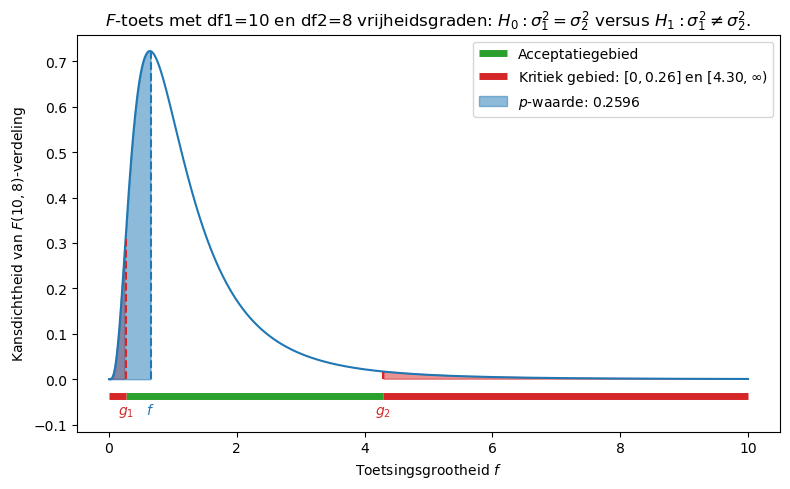

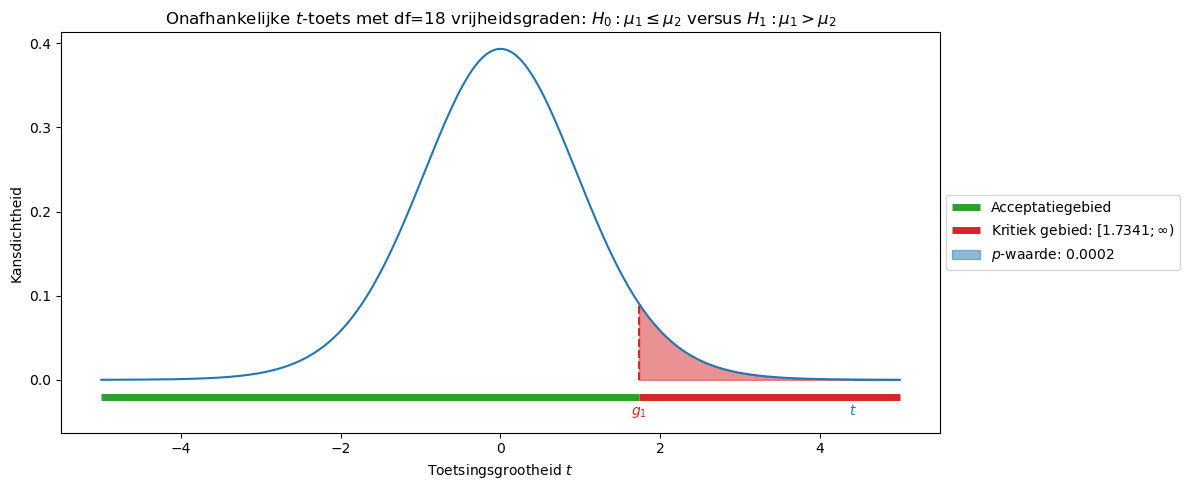

In [49]:
# Voor gegevens
data1 = [62, 60, 65, 64, 61, 63, 66, 64]  # Hartslag vrouwen
data2 = [58, 59, 57, 60, 56, 58, 59, 57] # Hartslag mannen
alpha = 0.05
toetstype = "tweezijdig"

f_statistic, dfd, dfn, critical_region, p_value, conclusion = F_toets(data1, data2, alpha)
print("$F$-toets")
print(f"Toetsingsgrootheid: f \\approx {pretty_print(f_statistic)}")
print(f"Kritiek gebied: {critical_region}")
print(f"$p$-waarde \\approx {pretty_print(p_value)}")
print(f"Conclusie: {conclusion}")
plot_F_toets(f_statistic, alpha, dfn, dfd, filename=FIGURE_PATH + "test_F.png")

toetstype = "rechtszijdig"
t_statistic, df, critical_region, p_value, conclusion = onafhankelijke_t_toets(data1, data2, alpha, toetstype)
print("Onafhankelijke $t$-toets")
print(f"Toetsingsgrootheid: t \\approx {pretty_print(t_statistic)}")
print(f"Kritiek gebied: {critical_region}")
print(f"$p$-waarde \\approx {pretty_print(p_value)}")
print(f"Conclusie: {conclusion}")
plot_t_toets(t_statistic, alpha, df, toetstype, filename=FIGURE_PATH + "test_t.png")